## Imports

Jupyter Notebook provides the possibility of using libraries, functions and variables globally. This means, once you import the libraries, functions, etc. you won't have to import them again in the next cell. However, if for any reason you end the session (crash, timeout, etc.), then you'll have to run this cell to have your libraries imported again. So, let's go ahead and import whatever we need in this homework assignment.

In [92]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

## The  dataset

The dataset consists of over 20.000 materials and lists their physical features. From these features, we want to learn how to predict the critical temperature, i.e. the temperature we need to cool the material to so it becomes superconductive. First load and familiarize yourself with the data set a bit.

In [93]:
data = pd.read_csv('superconduct_train.csv')
print(data.shape) #(rows, columns)

(21263, 82)


In [94]:
data.head()

number_of_elements 
 mean_atomic_mass 
 wtd_mean_atomic_mass 
 gmean_atomic_mass 
 wtd_gmean_atomic_mass 
 entropy_atomic_mass 
 wtd_entropy_atomic_mass 
 range_atomic_mass 
 wtd_range_atomic_mass 
 std_atomic_mass 
 ... 
 wtd_mean_Valence 
 gmean_Valence 
 wtd_gmean_Valence 
 entropy_Valence 
 wtd_entropy_Valence 
 range_Valence 
 wtd_range_Valence 
 std_Valence 
 wtd_std_Valence 
 critical_temp 
 
 
 
 
 0 
 4 
 88.944468 
 57.862692 
 66.361592 
 36.116612 
 1.181795 
 1.062396 
 122.90607 
 31.794921 
 51.968828 
 ... 
 2.257143 
 2.213364 
 2.219783 
 1.368922 
 1.066221 
 1 
 1.085714 
 0.433013 
 0.437059 
 29.0 
 
 
 1 
 5 
 92.729214 
 58.518416 
 73.132787 
 36.396602 
 1.449309 
 1.057755 
 122.90607 
 36.161939 
 47.094633 
 ... 
 2.257143 
 1.888175 
 2.210679 
 1.557113 
 1.047221 
 2 
 1.128571 
 0.632456 
 0.468606 
 26.0 
 
 
 2 
 4 
 88.944468 
 57.885242 
 66.361592 
 36.122509 
 1.181795 
 0.975980 
 122.90607 
 35.741099 
 51.968828 
 ... 
 2.271429 
 2.213364 
 2.232679 
 1.368922 
 1.029175 
 1 
 1.114286 
 0.433013 
 0.444697 
 19.0 
 
 
 3 
 4 
 88.944468 
 57.873967 
 66.361592 
 36.119560 
 1.181795 
 1.022291 
 122.90607 
 33.768010 
 51.968828 
 ... 
 2.264286 
 2.213364 
 2.226222 
 1.368922 
 1.048834 
 1 
 1.100000 
 0.433013 
 0.440952 
 22.0 
 
 
 4 
 4 
 88.944468 
 57.840143 
 66.361592 
 36.110716 
 1.181795 
 1.129224 
 122.90607 
 27.848743 
 51.968828 
 ... 
 2.242857 
 2.213364 
 2.206963 
 1.368922 
 1.096052 
 1 
 1.057143 
 0.433013 
 0.428809 
 23.0 
 
 
 
 5 rows × 82 columns

Because the dataset is rather large, we prepare a small subset of the data as training set, and another subset as test set. To make the computations reproducible, we set the random seed. This makes the train and test splits same even if you re-run the notebook. 

In [95]:
target_clm = 'critical_temp'  # the critical temperature is our target variable
n_trainset = 200  # size of the training set
n_testset = 500  # size of the test set

In [96]:
# set random seed to make sure every test set is the same
np.random.seed(seed=1) #seed is start value of the algorithm generating the sequence of pseudorandom numbers
#keeping it the stable means that the sequence is always the same

idx = np.arange(data.shape[0])
idx_shuffled = np.random.permutation(idx)  # shuffle indices to split into training and test set

test_idx = idx_shuffled[:n_testset]
train_idx = idx_shuffled[n_testset:n_testset+n_trainset]
train_full_idx = idx_shuffled[n_testset:]

X_test = data.loc[test_idx, data.columns != target_clm].values
y_test = data.loc[test_idx, data.columns == target_clm].values
print('Test set shapes (X and y)', X_test.shape, y_test.shape)

X_train = data.loc[train_idx, data.columns != target_clm].values
y_train = data.loc[train_idx, data.columns == target_clm].values
print('Small training set shapes (X and y):', X_train.shape, y_train.shape)

X_train_full = data.loc[train_full_idx, data.columns != target_clm].values
y_train_full = data.loc[train_full_idx, data.columns == target_clm].values
print('Full training set shapes (X and y):', X_train_full.shape, y_train_full.shape)

Test set shapes (X and y) (500, 81) (500, 1)
Small training set shapes (X and y): (200, 81) (200, 1)
Full training set shapes (X and y): (20763, 81) (20763, 1)


## Task 1: Plot the dataset

To explore the dataset, use `X_train_full` and `y_train_full` for two descriptive plots:

* **Histogram** of the target variable. Use `plt.hist`.

* **Scatter plots** relating the target variable to one of the feature values. For this you will need 81 scatter plots. Arrange them in one big figure with 9x9 subplots. Use `plt.scatter`. You may need to adjust the marker size and the alpha blending value. 

Furthermore, we need to normalize the data, such that each feature has a mean of zero and a variance of one. Implement a function `normalize` which normalizes the data. Print the means and standard variation of the first five features before and after.

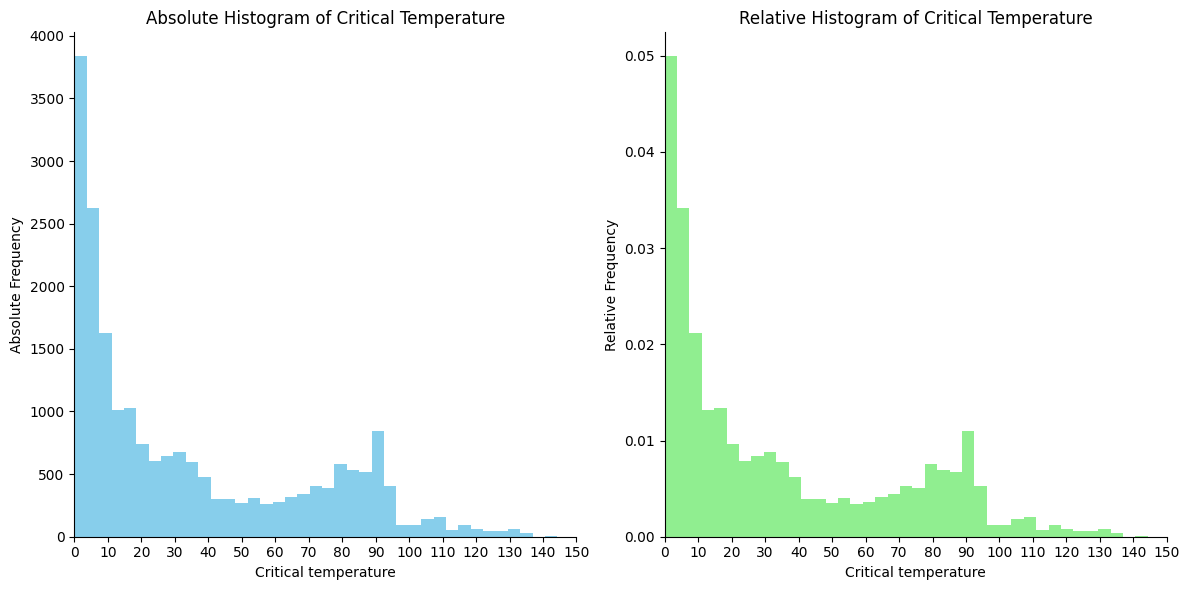

In [97]:
# Histogram of the target variable
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].hist(y_train_full, bins=50, color='skyblue')
axes[0].set_ylabel('Absolute Frequency')
axes[0].set_title('Absolute Histogram of Critical Temperature')

axes[1].hist(y_train_full, density=True, bins=50, color='lightgreen')
axes[1].set_ylabel('Relative Frequency')
axes[1].set_title('Relative Histogram of Critical Temperature')

for ax in axes.flatten():
    ax.set_xlim(0, 150)
    ax.set_xticks(range(0, 151, 10))
    ax.set_xlabel('Critical temperature')
    
sns.despine() # without argument defaults to removal of top and right spine ("frame lines")
plt.tight_layout()
plt.show()

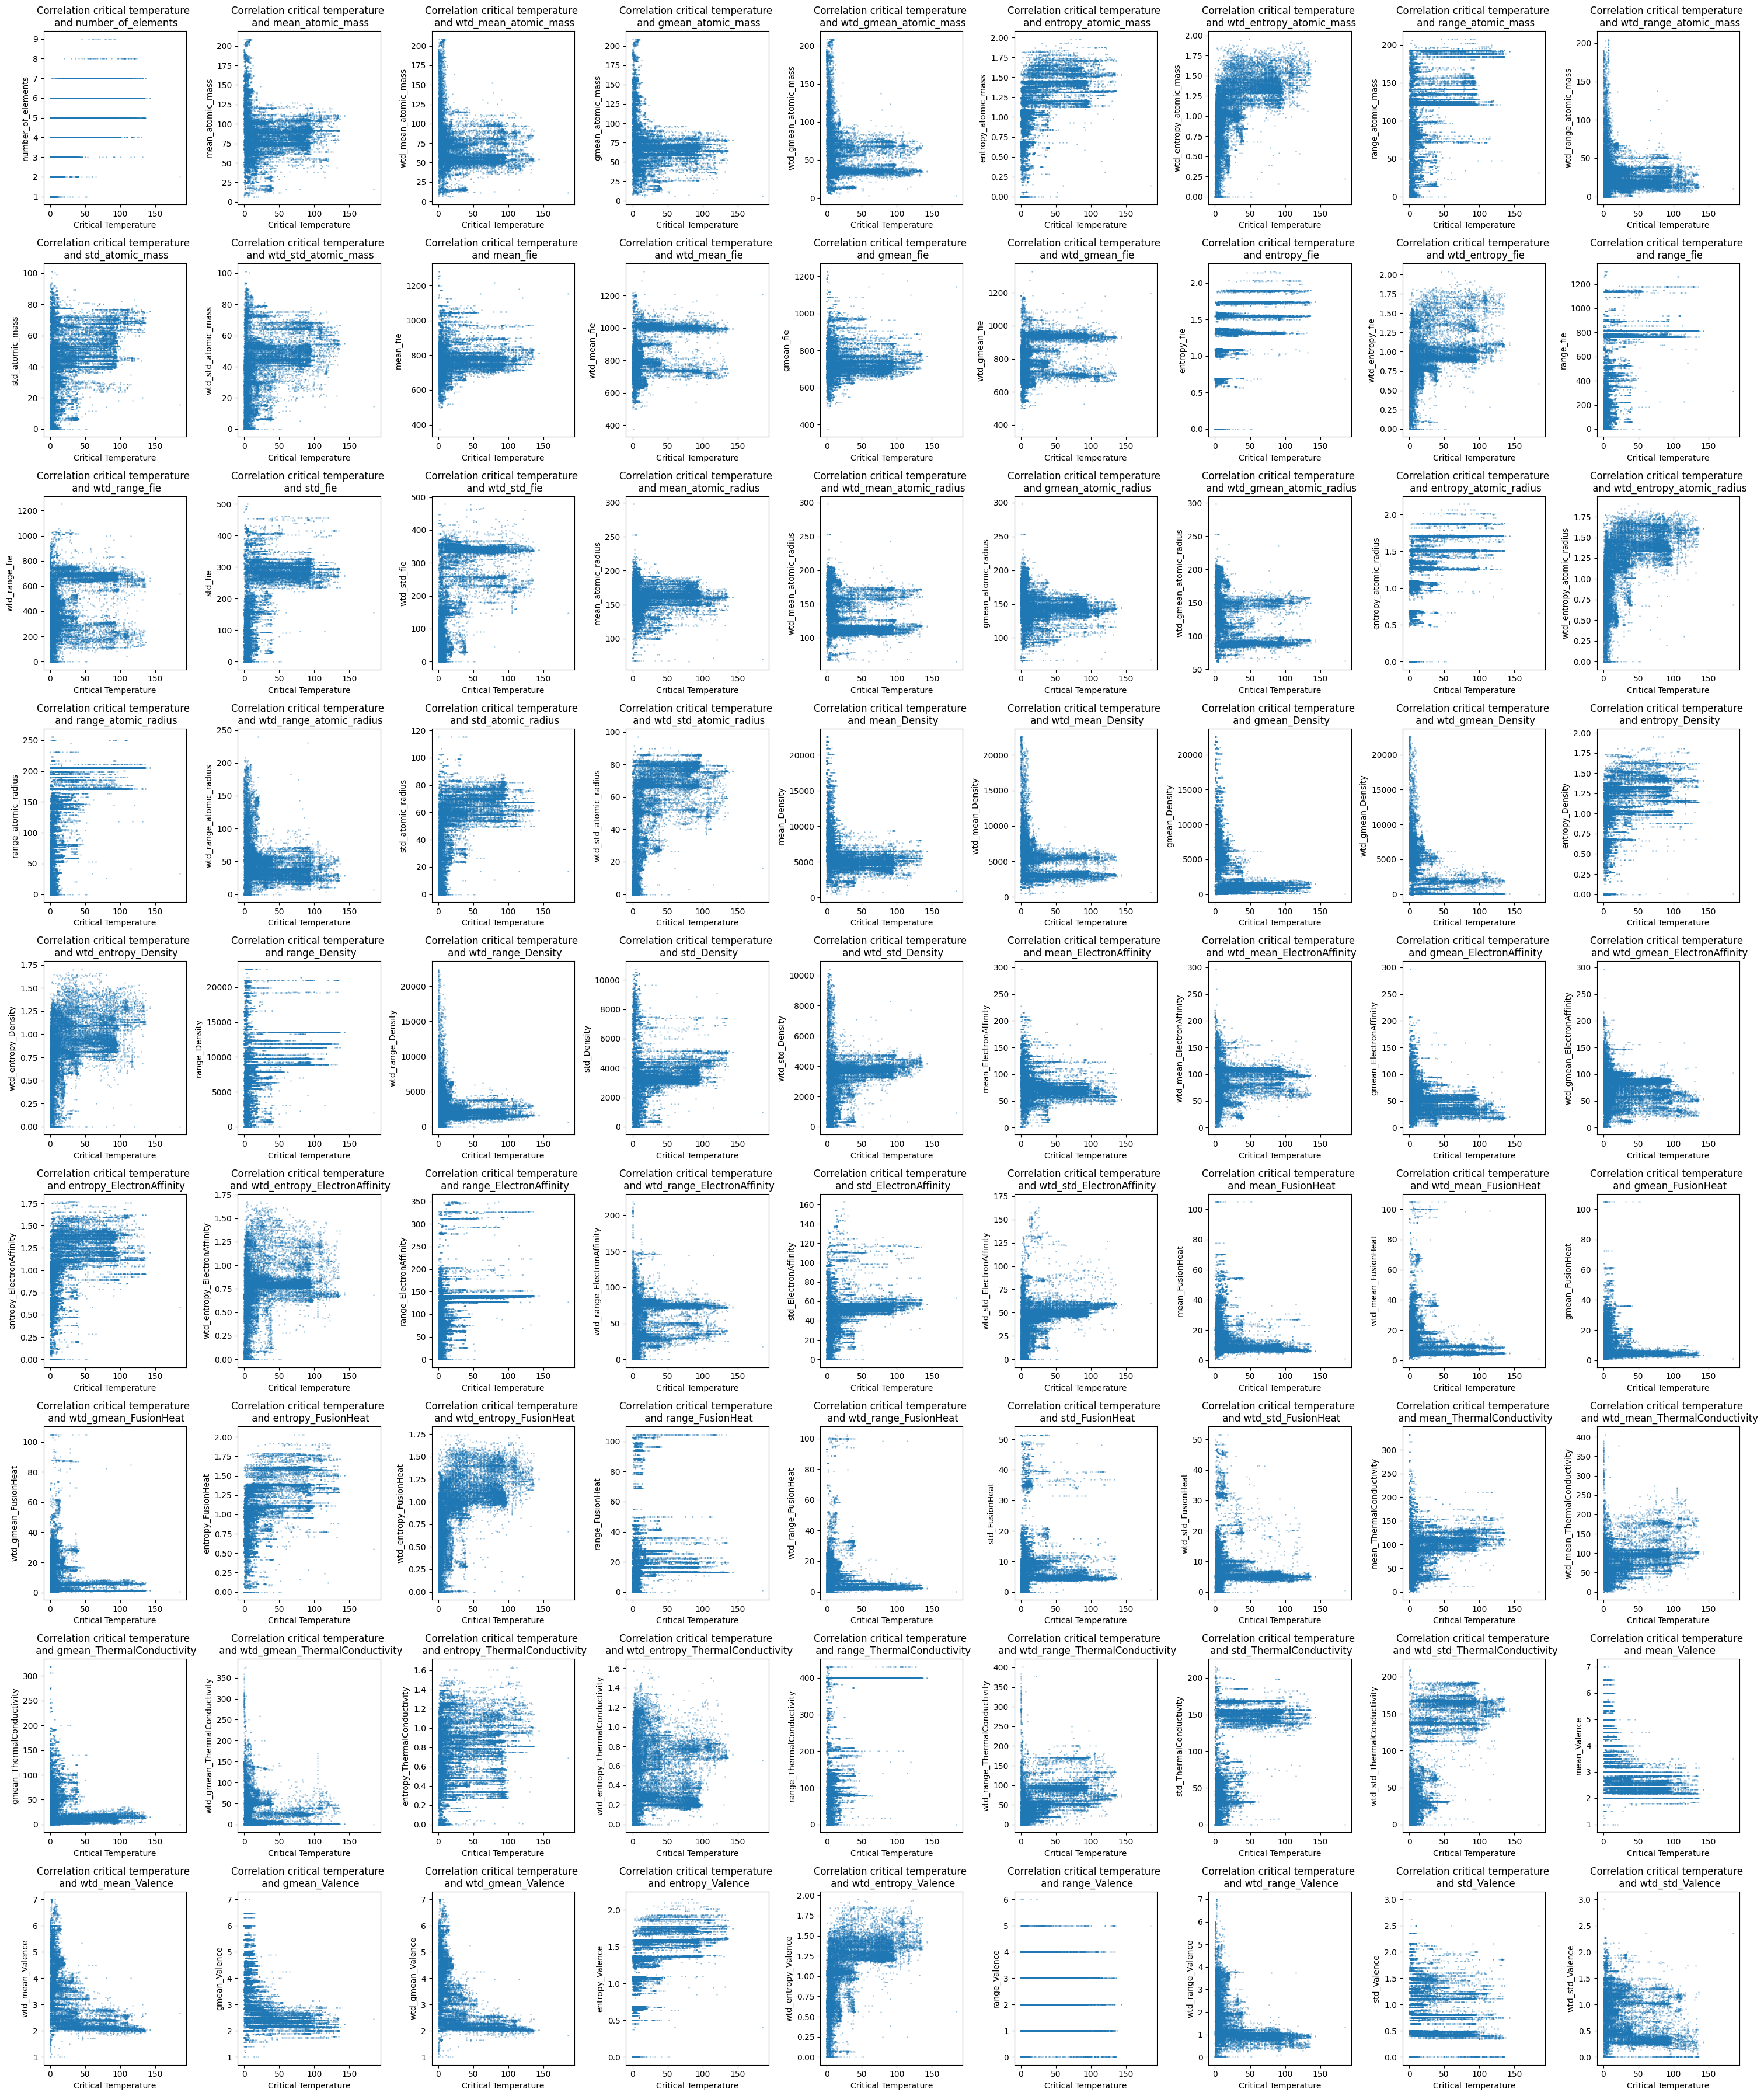

In [98]:
# Scatter plots of the target variable vs. features
fig, axes = plt.subplots(9, 9, figsize=(30,36))

for i in range(9):
    for j in range(9):
        axes[i,j].scatter(y_train_full, X_train_full[:,i * 9 + j], s=1, alpha=0.3) 
        axes[i,j].set_title(f"Correlation critical temperature \n and {data.columns[i*9+j]}")
        axes[i,j].set_xlabel("Critical Temperature")
        axes[i,j].set_ylabel(data.columns[i*9+j])
        
plt.tight_layout()
plt.show()

In [99]:
# Normalize
def normalize(arr):
    norm_arr = np.empty_like(arr)
    for feature in range(arr.shape[1]):
        mean = np.mean(arr[:,feature])
        std = np.std(arr[:,feature])
        norm_feat = (arr[:,feature] - mean) / std
        if feature < 5:
            print(f"Feature {feature}")
            print(f"Mean before: {np.mean(arr[:,feature])}")
            print(f"Mean after: {np.mean(norm_feat)}")
            print(f"Std before: {np.std(arr[:,feature])}")
            print(f"Std after: {np.std(norm_feat)}")
        norm_arr[:, feature] = norm_feat
    return norm_arr

In [100]:
norm_X = normalize(X_train_full)

Feature 0
Mean before: 4.112218850840438
Mean after: -2.0464506862425464e-16
Std before: 1.4396048331710802
Std after: 0.9999999999999998
Feature 1
Mean before: 87.60808136583881
Mean after: -2.8198584706753485e-16
Std before: 29.702997335967
Std after: 1.0
Feature 2
Mean before: 73.04988360343053
Mean after: 1.1430008849582116e-16
Std before: 33.56235884855743
Std after: 1.0
Feature 3
Mean before: 71.34256083274673
Mean after: 1.8274325525978592e-16
Std before: 31.075554104235316
Std after: 1.0
Feature 4
Mean before: 58.6033566064307
Mean after: -1.6426360023351542e-17
Std before: 36.73208565810088
Std after: 1.0


In [101]:
X_train = normalize(X_train)
X_test = normalize(X_test)

Feature 0
Mean before: 4.185
Mean after: 2.9309887850104134e-16
Std before: 1.5102234933942724
Std after: 0.9999999999999999
Feature 1
Mean before: 87.71633360217524
Mean after: -2.3092638912203257e-16
Std before: 29.24216733759368
Std after: 1.0
Feature 2
Mean before: 73.21230300793641
Mean after: -4.796163466380677e-16
Std before: 31.443899465243085
Std after: 1.0
Feature 3
Mean before: 71.15119648685723
Mean after: -3.8635761256955447e-16
Std before: 30.725859874747538
Std after: 1.0
Feature 4
Mean before: 58.43925604980193
Mean after: 8.43769498715119e-17
Std before: 34.87710465494954
Std after: 1.0
Feature 0
Mean before: 4.24
Mean after: -1.6697754290362354e-16
Std before: 1.419295599936814
Std after: 0.9999999999999999
Feature 1
Mean before: 85.46262335692079
Mean after: -7.069900220812997e-16
Std before: 28.444589236496295
Std after: 1.0
Feature 2
Mean before: 70.43142338625537
Mean after: 2.5579538487363605e-16
Std before: 30.20466364433349
Std after: 0.9999999999999999
Feature

Which material properties may be useful for predicting superconductivity? What other observations can you make?

In [102]:

for i in range(81):
    corr=np.corrcoef(y_train_full[:,0],X_train_full[:,i])[0,1]
    if np.abs(corr)>0.62:
        print(data.columns[i],corr)

wtd_entropy_atomic_mass 0.6279132124945909
range_atomic_radius 0.6537758376564884
range_ThermalConductivity 0.6868978110721008
std_ThermalConductivity 0.6524869726610889
wtd_std_ThermalConductivity 0.7208141915464702
wtd_mean_Valence -0.6321909875832141


# Predicting superconductivity
We understand 'predict' to mean correlation, and have calculated the correlation coefficients above. The coefficient can be a value between -1 and 1. The higher the absolute value of the coefficient, the better the correlation between the properties. Thus we look for a correlation coefficient >0.5, or <0.5. Because there are many properties with a correlation coefficient <0.5 or >0.5 in the dataset, we only look for these with a very good HIA  correlation. We find the best correlation for the weighted standard deviation Thermal Conductivity. So this property is the best choice to predict the superconductivity.  

# Other observations
Most materials seem to have a critical temperature approaching 0 K or generally in very low temperatures.
The dataset is dividable based on critical temperature around the temperature of 95 K. For colder temperatures, it seems to yield four subgroups, the 0-20 K interval, the 20-40 K interval, the 40-80 interval and the 80-95 K interval.













## Task 2:  Implement your own OLS estimator

We want to use linear regression to predict the critical temperature. Implement the ordinary least squares estimator without regularization 'by hand':

$w = (X^TX)^{-1}X^Ty$

To make life a bit easier, we provide a function that can be used to plot regression results. In addition it computes the mean squared error and the squared correlation between the true and predicted values. 

In [103]:
def plot_regression_results(y_test, y_pred, weights):
    '''Produces three plots to analyze the results of linear regression:
        -True vs predicted
        -Raw residual histogram
        -Weight histogram

    Inputs:
        y_test: (n_observations,) numpy array with true values
        y_pred: (n_observations,) numpy array with predicted values
        weights: (n_weights) numpy array with regression weights'''

    print('MSE: ', mean_squared_error(y_test, y_pred))
    print('r^2: ', r2_score(y_test, y_pred))

    fig, ax = plt.subplots(1, 3, figsize=(9, 3))
    # predicted vs true
    ax[0].scatter(y_test, y_pred, s=2)
    ax[0].set_title('True vs. Predicted')
    ax[0].set_xlabel('True %s' % (target_clm))
    ax[0].set_ylabel('Predicted %s' % (target_clm))

    # residuals
    error = np.squeeze(np.array(y_test)) - np.squeeze(np.array(y_pred))
    ax[1].hist(np.array(error), bins=30)
    ax[1].set_title('Raw residuals')
    ax[1].set_xlabel('(true-predicted)')

    # weight histogram
    ax[2].hist(weights, bins=30)
    ax[2].set_title('weight histogram')

    plt.tight_layout()

As an example, we here show you how to use this function with random data. 

MSE:  17928.79570726673
r^2:  -13.313953173396845


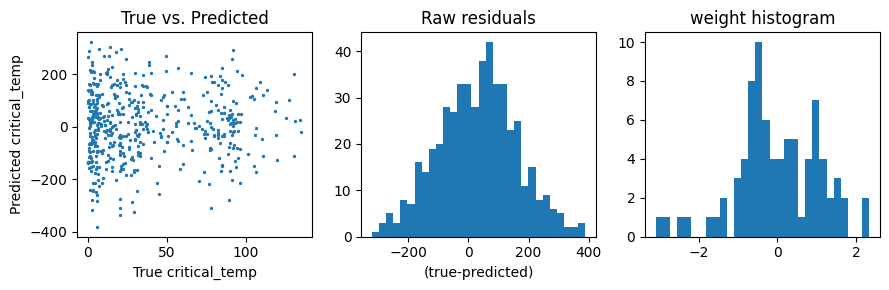

In [104]:
# weights is a vector of length 82: the first value is the intercept (beta0), then 81 coefficients
weights = np.random.randn(82)

# Model predictions on the test set
y_pred_testing = np.random.randn(y_test.size) * np.max(y_test)


plot_regression_results(y_test, y_pred_testing, weights)

Implement OLS linear regression yourself. Use `X_train` and `y_train` for estimating the weights and compute the MSE and $r^2$ from `X_test`. When you call our plotting function with the regression result, you should get mean squared error of 707.8.

In [105]:

def ols_regression(X_test, X_train, y_train):
    '''Computes OLS weights for linear regression without regularization on the training set and
       returns weights and testset predictions.

       Inputs:
         X_test: (n_observations, 81), numpy array with predictor values of the test set
         X_train: (n_observations, 81), numpy array with predictor values of the training set
         y_train: (n_observations, 1) numpy array with true target values for the training set

       Outputs:
         weights: The weight vector for the regression model including the offset
         y_pred: The predictions on the TEST set

       Note:
         Both the training and the test set need to be appended manually by a columns of 1s to add
         an offset term to the linear regression model.
    '''

    # ---------------- INSERT CODE ----------------------
    # Adding the offset
    X_train_offset = np.hstack((X_train, np.ones((X_train.shape[0], 1))))
    X_test_offset = np.hstack((X_test, np.ones((X_test.shape[0], 1))))
    
    # Calculating weights with 𝑤=(𝑋^(𝑇)𝑋)^(-1)𝑋^(𝑇)𝑦
    weights = np.dot(np.dot(np.linalg.inv(np.dot(X_train_offset.T,X_train_offset)), X_train_offset.T),
                    y_train)
    
    # Predicting by dot product new data and weights
    y_pred = np.dot(X_test_offset, weights)
    
    # ---------------- END CODE -------------------------

    return weights, y_pred

In [106]:
weights, y_pred = ols_regression(X_test, X_train, y_train)

MSE:  707.800884490946
r^2:  0.4349074593679543


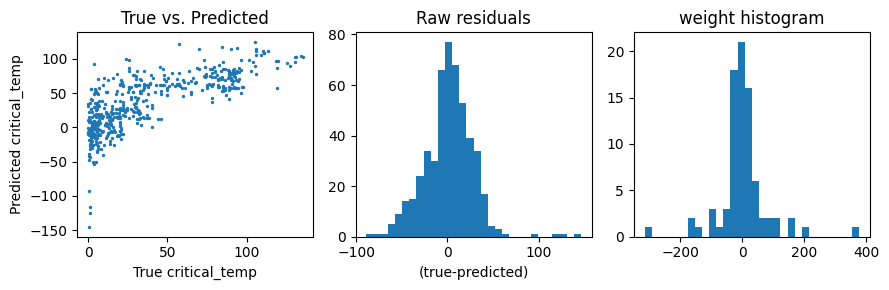

In [107]:
# Plots of the results
plot_regression_results(y_test, y_pred, weights)

What do you observe? Is the linear regression model good?

# Observations

In the true vs. predicted diagram, we can observe that the model fails utterly for values below zero, especially from -50 on. If we only look at the values above 0, or above -50, we might estimate carefully that the model fits much better.

This intuition is confirmed by the second diagram, which shows the percentage of differences between the true and the predicted values, i.e. how much the predicted values differ from the true values. Thus, a spike around 0 means that both values are fairly similar to each other, i.e. the prediction roughly fits the true value. Furthermore, with a little bit of fantasy, one can observe what looks like a Gaussian shape with a mean of zero around the plotted values.

The third plot shows the percentage of weights with a certain value in our model. Here we see that most weights are grouped around value 0, but due to the scaling of the axis, we should not conclude that they have little or no effect on the predictions of our model. 

# Conclusions

The r^2 value is relatively small, i.e. indicates the model is bad. But the interpretation of that ultimately depends on the field and context, e.g. in social sciences this is generally considered to be an OK value. Considering our observations above, we would interpret our model to be bad, and see this confirmed in the value of r^2.

In general, the smaller the MSE the better, but determining for each case a value where "to draw the line" differs due to the value ranges taken by the variables involved. You can see that our true critical temperature varies between 0 and roughly 150. The calculated MSE is 707.8, so much larger than the variance of the true values. This indicates that the model is not a good model.

## Task 3: Compare your implementation to sklearn

Now, familiarize yourself with the sklearn library. In the section on linear models:

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

you will find `sklearn.linear_model.LinearRegression`, the `sklearn` implementation of the OLS estimator. Use this sklearn class to implement OLS linear regression. Again obtain estimates of the weights on `X_train` and `y_train` and compute the MSE and $r^2$ on `X_test`.

In [108]:
from sklearn.linear_model import LinearRegression

In [109]:
def sklearn_regression(X_test, X_train, y_train):
    '''Computes OLS weights for linear regression without regularization using the sklearn library on the training set and
       returns weights and testset predictions.

       Inputs:
         X_test: (n_observations, 81), numpy array with predictor values of the test set
         X_train: (n_observations, 81), numpy array with predictor values of the training set
         y_train: (n_observations,) numpy array with true target values for the training set

       Outputs:
         weights: The weight vector for the regerssion model including the offset
         y_pred: The predictions on the TEST set

       Note:
         The sklearn library automatically takes care of adding a column for the offset.
    '''

    # ---------------- INSERT CODE ----------------------
    reg_model = LinearRegression().fit(X_train, y_train)
    weights = reg_model.coef_
    y_pred = reg_model.predict(X_test)

    # ---------------- END CODE -------------------------

    return weights, y_pred

MSE:  707.8008845059858
r^2:  0.4349074593559469


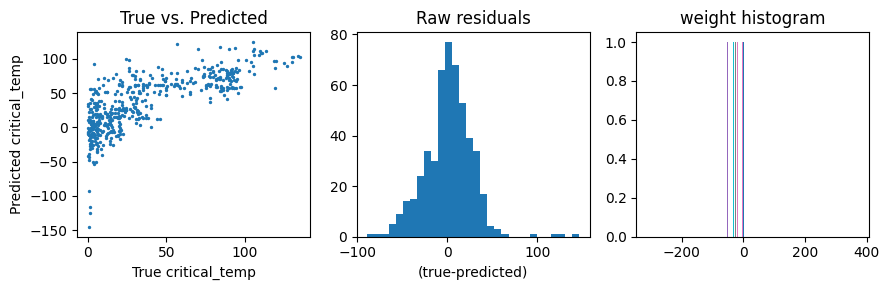

In [110]:
weights, y_pred = sklearn_regression(X_test, X_train, y_train)
plot_regression_results(y_test, y_pred, weights)

If you implemented everything correctly, the MSE is again 707.8.

Fit the model using the larger training set, `X_train_full` and `y_train_full`, and again evaluate on `X_test`.

MSE:  340.8728213881196
r^2:  0.7278546934719321


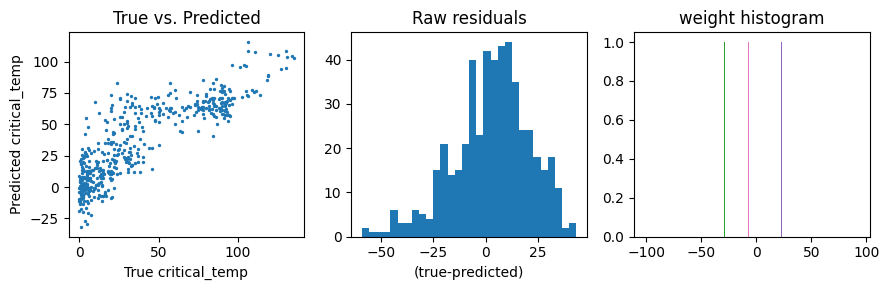

In [111]:
weights, y_pred = sklearn_regression(X_test, norm_X, y_train_full)
plot_regression_results(y_test, y_pred, weights)

 How does test set performance change? What else changes?

Between the result in Task 2 and the result in the first part of Task 3 there is no difference.
When you use more data, you can see that the r² value becomes larger and the MSE decreases. This indicates that a larger training set increases the predictive abilities of the model. Likely, it results in less overfitting on the training data, leading to a more generalizable model that predicts better on new and unseen data.

## Task 4: Regularization with ridge regression

We will now explore how a penalty term on the weights can improve the prediction quality for finite data sets. Implement the analytical solution of ridge regression 

$w = (X^TX + \alpha I_D)^{-1}X^Ty$


as a function that can take different values of $\alpha$, the regularization strength, as an input. In the lecture, this parameter was called $\lambda$, but this is a reserved keyword in Python.

In [112]:
def ridge_regression(X_test, X_train, y_train, alpha):
    '''Computes OLS weights for regularized linear regression with regularization strength alpha
       on the training set and returns weights and testset predictions.

       Inputs:
         X_test: (n_observations, 81), numpy array with predictor values of the test set
         X_train: (n_observations, 81), numpy array with predictor values of the training set
         y_train: (n_observations,) numpy array with true target values for the training set
         alpha: scalar, regularization strength

       Outputs:
         weights: The weight vector for the regression model including the offset
         y_pred: The predictions on the TEST set

       Note:
         Both the training and the test set need to be appended manually by a columns of 1s to add
         an offset term to the linear regression model.
    '''

    # ---------------- INSERT CODE ----------------------
    # Adding the ofset
    X_train_offset = np.hstack((X_train, np.ones((X_train.shape[0], 1))))
    X_test_offset = np.hstack((X_test, np.ones((X_test.shape[0], 1))))
    
    # Calculating weights with 𝑤=(𝑋^(𝑇)𝑋+alpha*I)^(−1)𝑋^(𝑇)𝑦
    XTX = np.dot(X_train_offset.T, X_train_offset)
    I = np.eye(XTX.shape[0])
    weights = np.dot(np.dot(np.linalg.inv(XTX + alpha*I), X_train_offset.T), y_train)

    # Predicting by dot product (new data * weights)
    y_pred = np.dot(X_test_offset, weights)
    # ---------------- END CODE -------------------------

    return weights, y_pred

Run the ridge regression on `X_train` with an alpha value of 10 and plot the obtained weights.

MSE:  428.09796358695974
r^2:  0.6582160729330728


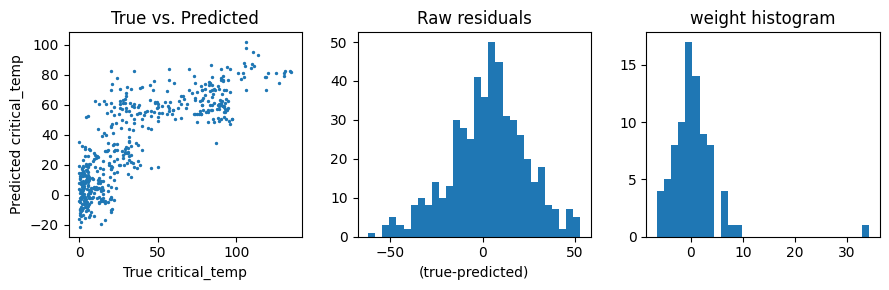

In [113]:
# Run ridge regression with alpha=10
weights, y_pred = ridge_regression(X_test, X_train, y_train, 10)

# Plot regression results
plot_regression_results(y_test, y_pred, weights)

Now test a range of log-spaced $\alpha\text{s}$ (~10-20), which cover several orders of magnitude, e.g. from 10^-7 to 10^7. 

* For each $\alpha$, you will get one model with one set of weights. 
* For each model, compute the error on the test set. 

Store both the errors and weights of all models for later use. You can use the function `mean_squared_error` from sklearn (imported above) to compute the MSE.

In [114]:
alphas = np.logspace(-7, 7, 20)

# ---------------- INSERT CODE ----------------------
all_weights = []
all_errors = []

for alpha in alphas:
    weights, y_pred = ridge_regression(X_test, X_train, y_train, alpha)
    error = mean_squared_error(y_test, y_pred)
    all_weights.append(weights)
    all_errors.append(error)
# ---------------- END CODE -------------------------

In [115]:
all_weights = np.array(all_weights).squeeze()
all_errors = np.array(all_errors).squeeze()

Make a single plot that shows for each coefficient how it changes with $\alpha$, i.e. one line per coefficient. Also think about which scale is appropriate for your $\alpha$-axis. You can set this using `plt.xscale(...)`.

In [116]:
all_weights.shape

(20, 82)

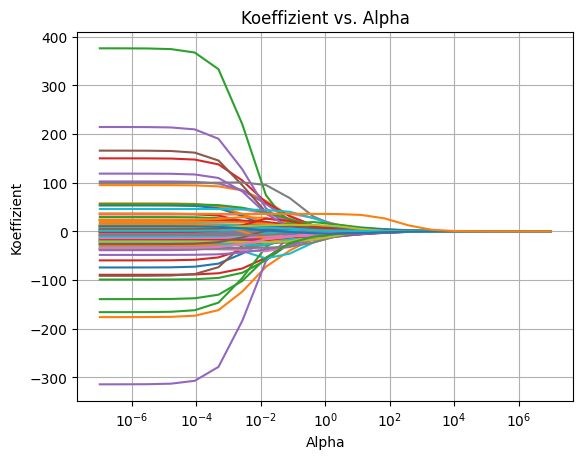

In [117]:
# Plot of coefficients vs. alphas
for i in range(all_weights.shape[1]):
    plt.plot(alphas, all_weights[:, i], label=f"Koeffizient {i}")

plt.xlabel("Alpha")
plt.ylabel("Koeffizient")
plt.title("Koeffizient vs. Alpha")
plt.xscale("log")
plt.grid(True)  
plt.show()

Why are the values of the weights largest on the left? Do they all change monotonically? 

The alpha gives a limit for the weights. So if alpha gets bigger (right side) the weights become 0. That explains why the weights are largest on the left. 

In the graphics you can't see it well, but not all weights change monotonically. Especially the weights near zero don't change monotonically.

Plot how the performance (i.e. the error) changes as a function of $\alpha$. As a sanity check, the MSE value for very small $\alpha$ should be close to the test-set MSE of the unregularized solution, i.e. 708.

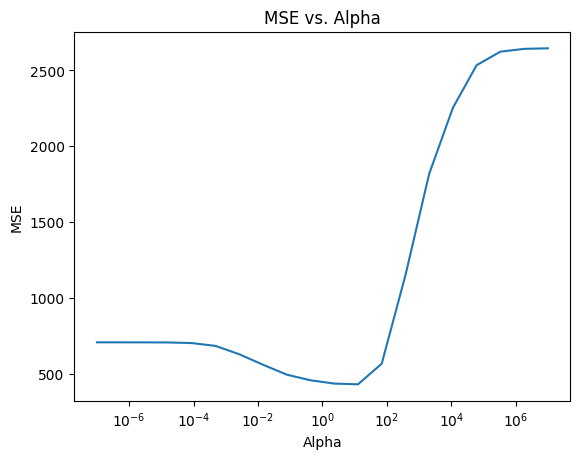

In [118]:
# Plot of MSE  vs. alphas
plt.plot(alphas, all_errors)

plt.xlabel("Alpha")
plt.ylabel("MSE")
plt.title("MSE vs. Alpha")
plt.xscale("log")
plt.show()

Which value of $\alpha$ gives the minimum MSE? Is it better than the unregularized model? Why should the curve reach ~700 on the left?

For a alpha of approximatly 10¹ the error becomes minimal. At this point the error is about 490 which is less and so better than the unregularized model. The unregularized model had a error of 707.8. This is about the error you get for a small alpha. That makes sense, because the model with a small alpha is like the unregularized model.

Now implement the same model using sklearn. Use the `linear_model.Ridge` object to do so.

In [119]:
from sklearn.linear_model import Ridge

In [120]:
def ridge_regression_sklearn(X_test, X_train, y_train, alpha):
    '''Computes OLS weights for regularized linear regression with regularization strength alpha using the sklearn
       library on the training set and returns weights and testset predictions.

       Inputs:
         X_test: (n_observations, 81), numpy array with predictor values of the test set
         X_train: (n_observations, 81), numpy array with predictor values of the training set
         y_train: (n_observations,) numpy array with true target values for the training set
         alpha: scalar, regularization strength

       Outputs:
         weights: The weight vector for the regerssion model including the offset
         y_pred: The predictions on the TEST set

       Note:
         The sklearn library automatically takes care of adding a column for the offset.
    '''

    # ---------------- INSERT CODE ----------------------
    clf = Ridge(alpha)
    reg_model = clf.fit(X_train, y_train)
    weights = reg_model.coef_
    y_pred = reg_model.predict(X_test)
    # ---------------- END CODE -------------------------

    return weights, y_pred

In [121]:
all_errors_sklearn = []
for alpha in alphas:
    weights, y_pred = ridge_regression_sklearn(X_test, X_train, y_train, alpha)
    error = mean_squared_error(y_test, y_pred)
    all_errors_sklearn.append(error)

This time, only plot how the performance changes as a function of $\alpha$. 

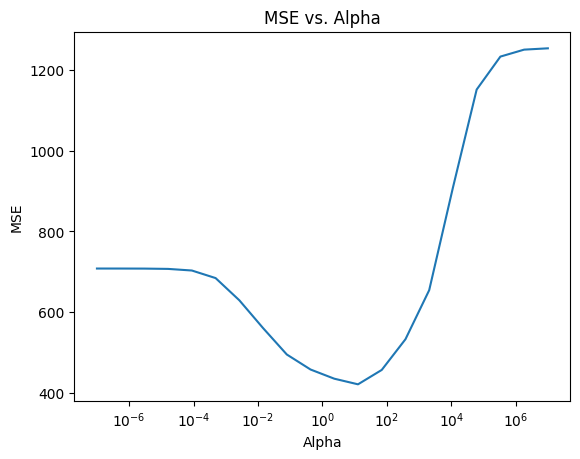

In [122]:
# Plot of MSE  vs. alphas
plt.plot(alphas, all_errors_sklearn)
plt.xlabel("Alpha")
plt.ylabel("MSE")
plt.title("MSE vs. Alpha")
plt.xscale("log")
plt.show()

Note: Don't worry if the curve is not exactly identical to the one you got above. The loss function we wrote down in the lecture  has $\alpha$ defined a bit differently compared to sklearn. However, qualitatively it should look the same.

## Task 5: Cross-validation

Until now, we always estimated the error on the test set directly. However, we typically do not want to tune hyperparameters of our inference algorithms like $\alpha$ on the test set, as this may lead to overfitting. Therefore, we tune them on the training set using cross-validation. As discussed in the lecture, the training data is here split in `n_folds`-ways, where each of the folds serves as a held-out dataset in turn and the model is always trained on the remaining data. Implement a function that performs cross-validation for the ridge regression parameter $\alpha$. You can reuse functions written above.

In [123]:
from sklearn.model_selection import KFold

In [124]:
def ridgeCV(X, y, n_folds, alphas):
    '''Runs a n_fold-crossvalidation over the ridge regression parameter alpha.
       The function should train the linear regression model for each fold on all values of alpha.

      Inputs:
        X: (n_obs, n_features) numpy array - predictor
        y: (n_obs,) numpy array - target
        n_folds: integer - number of CV folds
        alphas: (n_parameters,) - regularization strength parameters to CV over

      Outputs:
        cv_results_mse: (n_folds, len(alphas)) numpy array, MSE for each cross-validation fold

      Note:
        Fix the seed for reproducibility.
    '''
    
    cv_results_mse = np.zeros((n_folds, len(alphas)))
    np.random.seed(seed=2)

    # ---------------- INSERT CODE ----------------------
    kf = KFold(n_splits=n_folds, random_state=42, shuffle=True)
    fold_index = 0
    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        for i, alpha in enumerate(alphas):
            weights, y_pred = ridge_regression_sklearn(X_val, X_train, y_train, alpha)
            mse = mean_squared_error(y_val, y_pred)
            cv_results_mse[fold_index, i] = mse
        fold_index += 1
    # ---------------- END CODE -------------------------

    return cv_results_mse

Now we run 10-fold cross-validation using the training data of a range of $\alpha$s.

In [125]:
alphas = np.logspace(-7, 7, 100)
mse_cv = pd.DataFrame(ridgeCV(X_train, y_train, n_folds=10, alphas=alphas))

We plot the MSE trace for each fold separately:

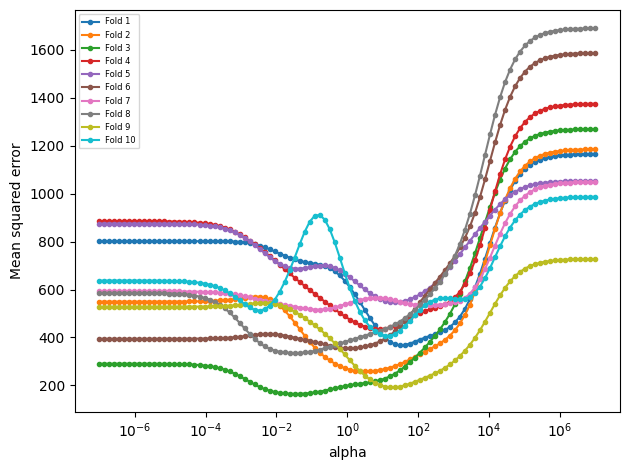

In [126]:
plt.plot(alphas, mse_cv.T, '.-')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Mean squared error')
labels = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5', 'Fold 6', 'Fold 7', 'Fold 8', 'Fold 9', 'Fold 10']
plt.legend(labels, loc="upper left", fontsize=6)  
plt.tight_layout()

We also plot the average across folds:

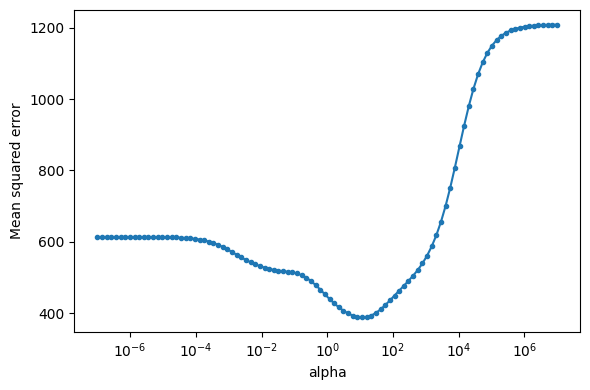

In [127]:
plt.figure(figsize=(6, 4))
plt.plot(alphas, np.mean(mse_cv, axis=0), '.-')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Mean squared error')
plt.tight_layout()

What is the optimal $\alpha$? Is it similar to the one found on the test set? Do the cross-validation MSE and the test-set MSE match well or differ strongly?

The optimal alpha, when you look at the average MSE, is again 10^1. That is the same alpha we found before. You can also see that the general shape of the curve is similar. Again we have the biggest values for the MSE for large alphas. When we compare the cross-validation MSE with the ones we found using sklearn we see that the MSE for small alphas has decreased from about 700 to 600. The other values are about the same.

We will now run cross-validation on the full training data. This will take a moment, depending on the speed of your computer. Afterwards, we will again plot the mean CV curves for the full data set (blue) and the small data set (orange).

In [128]:
alphas = np.logspace(-7, 7, 100)
mse_cv_full = ridgeCV(X_train_full, y_train_full, n_folds=10, alphas=alphas)

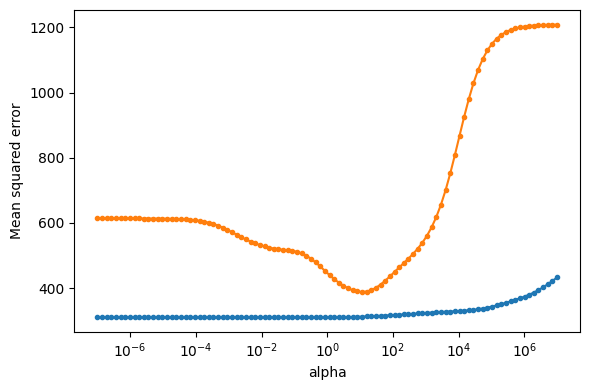

In [129]:
plt.figure(figsize=(6, 4))
plt.plot(alphas, np.mean(mse_cv_full, axis=0), '.-')
plt.plot(alphas, np.mean(mse_cv, axis=0), '.-')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Mean squared error')
plt.tight_layout()

We zoom in on the blue curve to the very left:

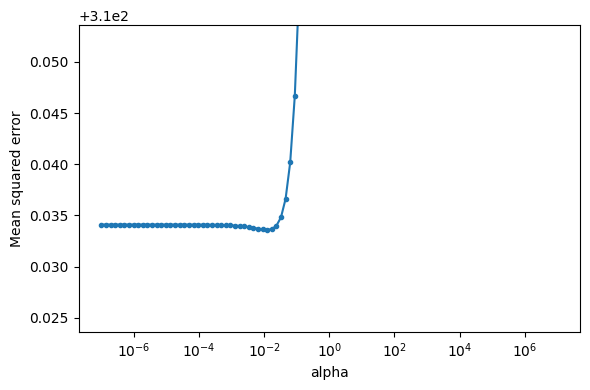

In [130]:
plt.figure(figsize=(6, 4))
plt.plot(alphas, np.mean(mse_cv_full, axis=0), '.-')
plt.xscale('log')
minValue = np.min(np.mean(mse_cv_full, axis=0))
plt.ylim([minValue-.01, minValue+.02])
plt.xlabel('alpha')
plt.ylabel('Mean squared error')
plt.tight_layout()

Why does the CV curve on the full data set look so different? What is the optimal value of $\alpha$ and why is it so much smaller than on the small training set?

To use the cross-validation more data is required. So when you have more data, the fitting will be optimised. This is why the MSEs are so much smaller when using the larger dataset. If you look at the second plot, it shows that the MSE is minimal for an alpha of about 10^(-2). The alpha helps to prevent overfitting, but when you have more data, overfitting isn't as much of a problem anymore. That can be a reason why the alpha is so much smaller for the full dataset.  